In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [19]:
# Load the dataset
phishing_df = pd.read_csv("phishing dataset.csv")

In [20]:
# Remove the first column (unnamed index)
phishing_df = phishing_df.drop(phishing_df.columns[0], axis=1)

In [21]:
# Explore the data
print(phishing_df.head())
print(phishing_df.info())
print(phishing_df['status'].value_counts())  # Check class distribution

   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \
0      0      0  ...                0                      1   
1      0      0  ...                1                      0   
2      0      3  ...                1                      0   
3      0      0  ...                1                      0   
4      0      0  ...                0                      1   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                          45    

In [22]:
# Convert 'status' to numerical (0 and 1)
le = LabelEncoder()
phishing_df['status'] = le.fit_transform(phishing_df['status'])

# Handle Missing Values (if any)
# Check for missing values
print(phishing_df.isnull().sum())

length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64


In [23]:
# Convert categorical features to numerical using one-hot encoding
categorical_features = ['ip', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']
phishing_df = pd.get_dummies(phishing_df, columns=categorical_features, drop_first=True) #Drop first to avoid multicollinearity


In [24]:
#Separate features and target variable
X = phishing_df.drop('status', axis=1)
y = phishing_df['status']

In [25]:
# Scale numerical features (important for many models)
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=np.number).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train a Random Forest model (you can try other models too)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.968941382327209
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



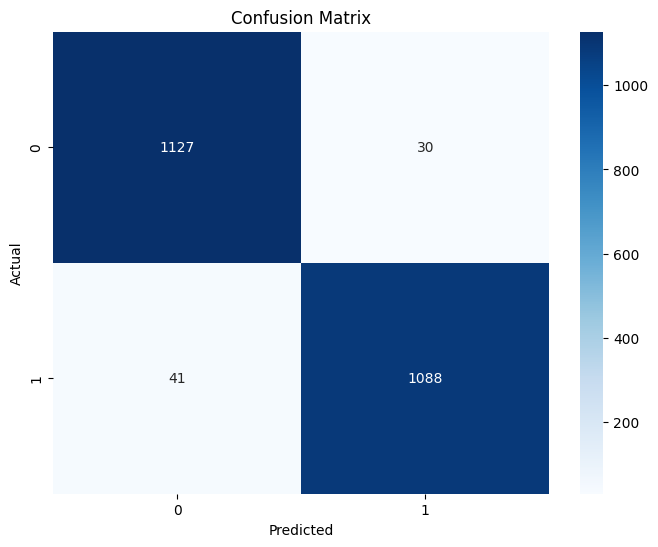

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix.png")
plt.show()

In [31]:
# Feature Importance (for Random Forest)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df.head(10))  # Print top 10 important features

Feature Importances:
                  Feature  Importance
1167       google_index_1    0.110100
57              page_rank    0.068859
41          nb_hyperlinks    0.065021
56            web_traffic    0.059299
19                 nb_www    0.034157
55             domain_age    0.032100
43    ratio_extHyperlinks    0.031753
42    ratio_intHyperlinks    0.029369
36      longest_word_path    0.029208
0              length_url    0.024321


In [32]:
# Separate features and target variable
X = phishing_df.drop('status', axis=1)
y = phishing_df['status']

# Scale numerical features (important for many models)
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=np.number).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# --- Save the trained model ---
with open('phishing_website_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# --- Save the scaler ---
with open('phishing_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Phishing model and scaler saved!")

Phishing model and scaler saved!
